In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('gb_combinations_catalog_new_features.csv')
df = df.sort_values(by=['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics'])


# Display the first few rows of the DataFrame
df.head()


,publisher_number,subscriber_number,message_size,retain,qos,topics,predicted_database_size
30,1,1,1,0,0,1,1.724722
31,1,1,1,0,0,2,1.724722
32,1,1,1,0,0,3,1.724722
33,1,1,1,0,0,4,1.724722
34,1,1,1,0,0,5,1.724722


In [3]:
# Find the NaN values in the DataFrame
# There could be NaN values due to some errors during the simulation
print(df.isna().sum())
# Drop the colums that includes nan in df
df = df.dropna()

publisher_number           0
subscriber_number          0
message_size               0
retain                     0
qos                        0
topics                     0
predicted_database_size    0
dtype: int64


In [4]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with database_size and ram_usage
# print(correlation_matrix[['database_size', 'ram_usage']])
print(correlation_matrix[['predicted_database_size']])


                         predicted_database_size
publisher_number                    3.739035e-01
subscriber_number                  -9.390531e-04
message_size                        1.746533e-01
retain                              7.938307e-16
qos                                 2.476041e-01
topics                              4.628426e-15
predicted_database_size             1.000000e+00


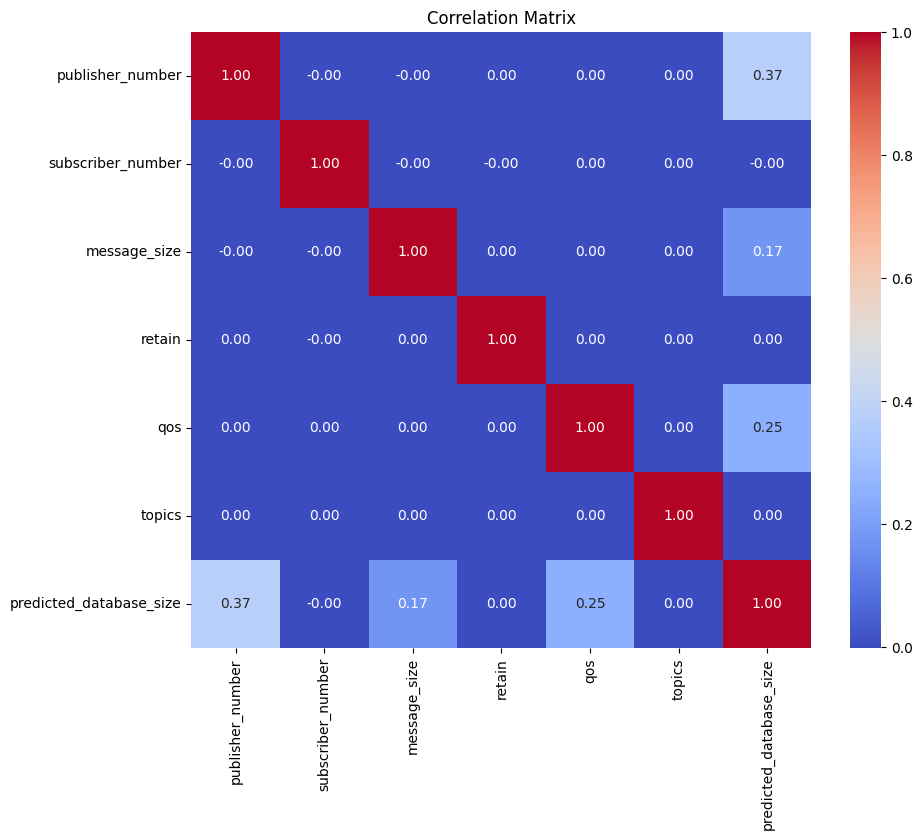

In [5]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


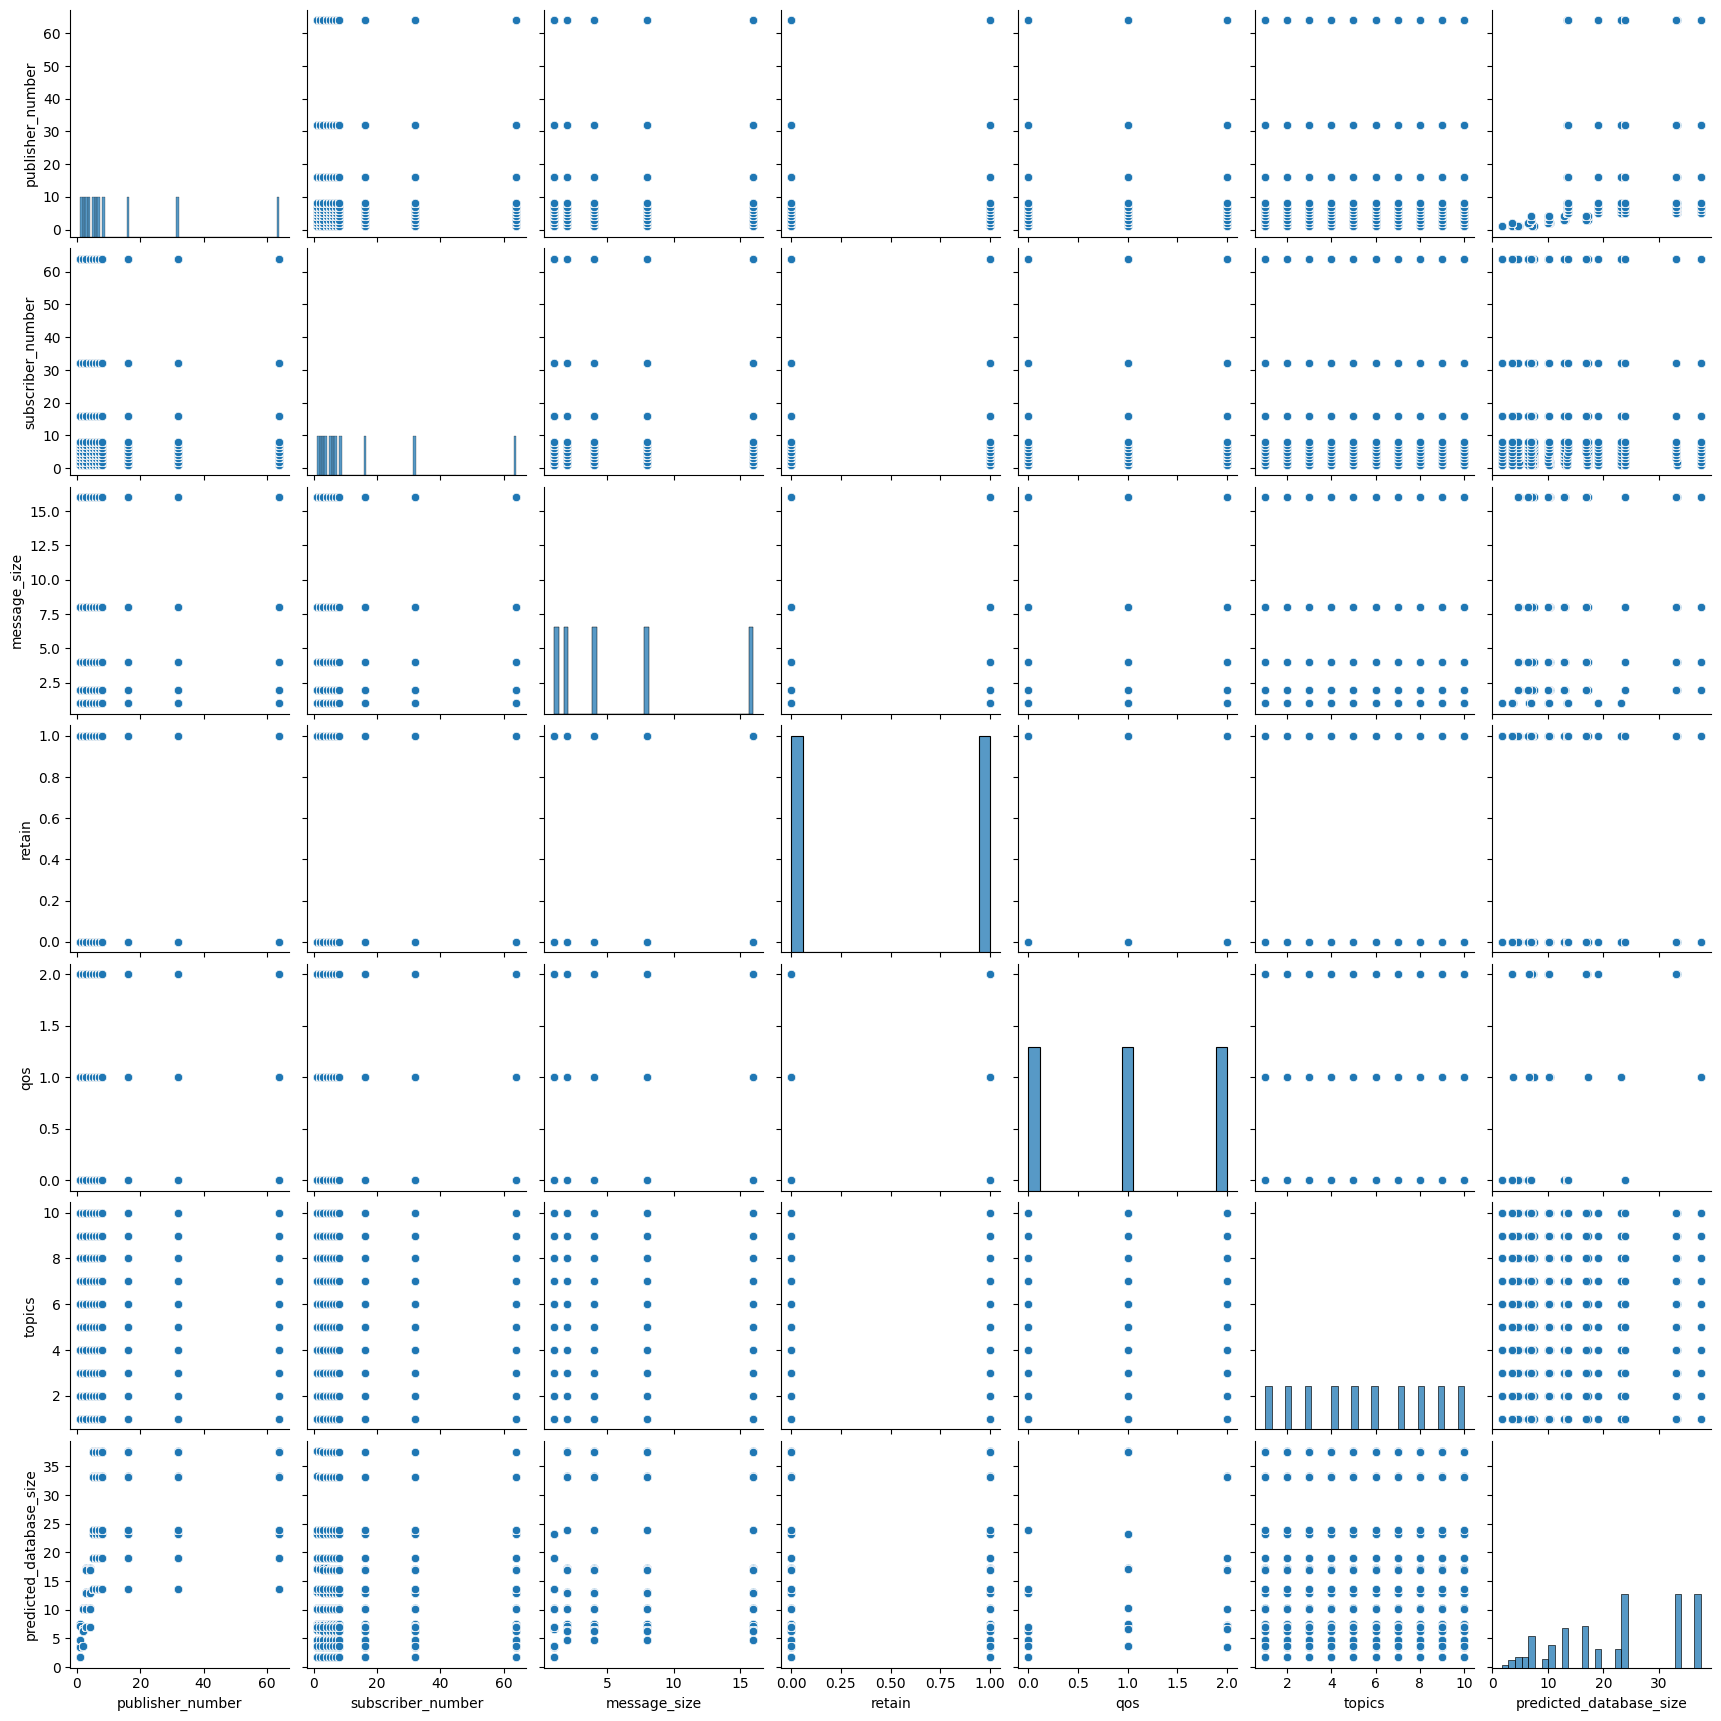

In [6]:
# Create pairplot
sns.pairplot(df)
plt.show()

   retain  qos  predicted_database_size
0       0    0                16.927213
1       0    1                26.429225
2       0    2                23.583888
3       1    0                16.927213
4       1    1                26.429225
5       1    2                23.583888


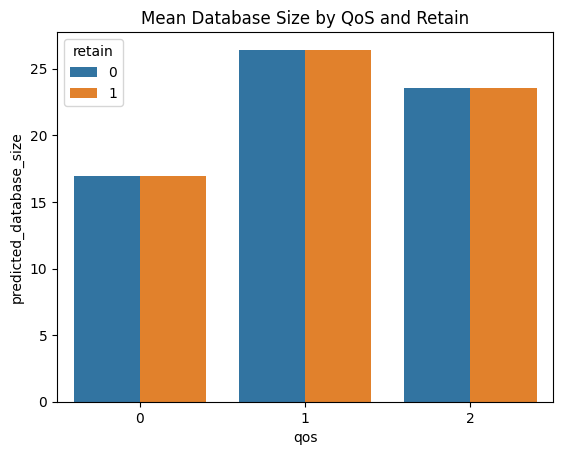

In [7]:
# Group by 'retain' and 'qos', and calculate the mean for 'database_size' and 'ram_usage'
# group_means = df.groupby(['retain', 'qos']).agg({'database_size': 'mean', 'ram_usage': 'mean'}).reset_index()
group_means = df.groupby(['retain', 'qos']).agg({'predicted_database_size': 'mean'}).reset_index()

# Display the grouped means
print(group_means)

# Plotting Mean Database Size by QoS and Retain
sns.barplot(data=group_means, x='qos', y='predicted_database_size', hue='retain')
plt.title('Mean Database Size by QoS and Retain')
plt.show()

# Plotting Mean RAM Usage by QoS and Retain
# sns.barplot(data=group_means, x='qos', y='ram_usage', hue='retain')
# plt.title('Mean RAM Usage by QoS and Retain')
# plt.show()

In [8]:
# Define the feature variables (X) and target variables (y)
X = df[['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics']]
# y_db = df['database_size']
# y_ram = df['ram_usage']
y_db = df['predicted_database_size']
# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_db, y_test_db = train_test_split(X, y_db, test_size=0.3, random_state=42)
# X_train, X_test, y_train_ram, y_test_ram = train_test_split(X, y_ram, test_size=0.3, random_state=42)

# Train the model for database_size
model_db = LinearRegression()
model_db.fit(X_train, y_train_db)

# Make predictions for database_size
y_pred_db = model_db.predict(X_test)

# Train the model for ram_usage
model_ram = LinearRegression()
# model_ram.fit(X_train, y_train_ram)

# Make predictions for ram_usage
# y_pred_ram = model_ram.predict(X_test)

# Evaluate the models
print(f'Database Size - R^2: {r2_score(y_test_db, y_pred_db)}, RMSE: {mean_squared_error(y_test_db, y_pred_db, squared=False)}')
# print(f'RAM Usage - R^2: {r2_score(y_test_ram, y_pred_ram)}, RMSE: {mean_squared_error(y_test_ram, y_pred_ram, squared=False)}')


Database Size - R^2: 0.23765570553260362, RMSE: 9.593227667648714


/Users/tugrul/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R^2 Score for Database Size: 1.00
MSE for Database Size: 0.00


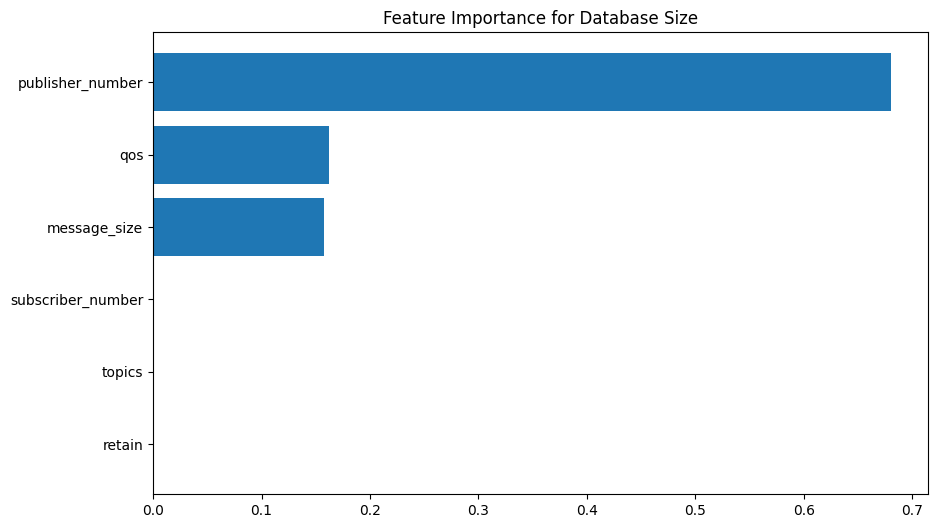

In [9]:
# Train a Random Forest model for database_size
rf_db = RandomForestRegressor(random_state=42)
rf_db.fit(X_train, y_train_db)
y_pred_db = rf_db.predict(X_test)

# Train a Random Forest model for ram_usage
rf_ram = RandomForestRegressor(random_state=42)
# rf_ram.fit(X_train, y_train_ram)
# y_pred_ram = rf_ram.predict(X_test)

# Calculate metrics for database_size
r2_db = r2_score(y_test_db, y_pred_db)
mse_db = mean_squared_error(y_test_db, y_pred_db)
print(f"R^2 Score for Database Size: {r2_db:.2f}")
print(f"MSE for Database Size: {mse_db:.2f}")

# Calculate metrics for ram_usage
# r2_ram = r2_score(y_test_ram, y_pred_ram)
# mse_ram = mean_squared_error(y_test_ram, y_pred_ram)
# print(f"R^2 Score for RAM Usage: {r2_ram:.2f}")
# print(f"MSE for RAM Usage: {mse_ram:.2f}")

# Feature importance for database_size
importances_db = rf_db.feature_importances_
feature_names = X.columns
sorted_indices_db = importances_db.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Database Size')
plt.barh(range(len(sorted_indices_db)), importances_db[sorted_indices_db], align='center')
plt.yticks(range(len(sorted_indices_db)), feature_names[sorted_indices_db])
plt.show()